In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 
print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

7f51e6cab50ec54576ff57aaae689d0d


## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [23]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url
cities[10]

'vaitupu'

In [33]:
temp = []
cloud = []
wind = []
humidity = []
plot_lat = []

for x in range(len(cities)):
    #some cities generated by cicipy are not in Open Weather database.  need error handling:
    try:
        # Get weather data
        weather_response = requests.get(url+"&q=" + cities[x])
        weather_json = weather_response.json()
        #print(f"The weather API responded with: {weather_json}.")
        print(f"City # {x} being processed: {weather_json['name']}, {weather_json['sys']['country']}.")
        temp.append(weather_json["main"]["temp"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        humidity.append(weather_json["main"]["humidity"])
        plot_lat.append(weather_json["coord"]["lat"])
    except:
        continue
len(plot_lat)

City # 0 being processed: Butaritari, KI.
City # 1 being processed: Busselton, AU.
City # 2 being processed: Albany, US.
City # 3 being processed: Fortuna, ES.
City # 4 being processed: Hermanus, ZA.
City # 5 being processed: Sisimiut, GL.
City # 6 being processed: Knysna, ZA.
City # 7 being processed: Manadhoo, MV.
City # 8 being processed: Villa del Rosario, CO.
City # 9 being processed: Bredasdorp, ZA.
City # 11 being processed: Hovd, NO.
City # 12 being processed: New Norfolk, AU.
City # 14 being processed: Los Llanos de Aridane, ES.
City # 15 being processed: Victoria, BN.
City # 16 being processed: Mandalgovi, MN.
City # 17 being processed: Mataura, NZ.
City # 20 being processed: Awjilah, LY.
City # 21 being processed: Xianyang, CN.
City # 22 being processed: Zalantun, CN.
City # 23 being processed: Ogulin, HR.
City # 24 being processed: Mar del Plata, AR.
City # 25 being processed: Vaini, IN.
City # 26 being processed: Chokurdakh, RU.
City # 27 being processed: Upernavik, GL.
Ci

City # 217 being processed: Port Elizabeth, US.
City # 218 being processed: Souillac, FR.
City # 219 being processed: Nizhneudinsk, RU.
City # 220 being processed: Kurilsk, RU.
City # 221 being processed: Russell, AR.
City # 222 being processed: Viedma, AR.
City # 223 being processed: Klaksvik, FO.
City # 224 being processed: Geraldton, CA.
City # 225 being processed: Kaffrine, SN.
City # 226 being processed: Timbiqui, CO.
City # 227 being processed: Bathsheba, BB.
City # 228 being processed: Verkh-Usugli, RU.
City # 230 being processed: Nanortalik, GL.
City # 231 being processed: Butka, RU.
City # 232 being processed: Nioro, GM.
City # 234 being processed: Torbay, CA.
City # 235 being processed: Sur, OM.
City # 236 being processed: Narsaq, GL.
City # 237 being processed: Manresa, ES.
City # 239 being processed: Glendive, US.
City # 240 being processed: Mucurapo, TT.
City # 241 being processed: Coihaique, CL.
City # 242 being processed: Dwarka, IN.
City # 243 being processed: Sitka, US

City # 440 being processed: Mattru, SL.
City # 441 being processed: Herat, AF.
City # 442 being processed: Mana, RS.
City # 443 being processed: Benito Juarez, MX.
City # 444 being processed: Rawson, AR.
City # 445 being processed: Bilibino, RU.
City # 446 being processed: Alofi, NU.
City # 447 being processed: Dingle, PH.
City # 448 being processed: Romny, UA.
City # 449 being processed: Broken Hill, AU.
City # 450 being processed: Halifax, CA.
City # 451 being processed: Pisco, PE.
City # 452 being processed: Pierrelatte, FR.
City # 454 being processed: Papara, BR.
City # 455 being processed: Padang, ID.
City # 456 being processed: Puerto Maldonado, PE.
City # 457 being processed: Fairbanks, US.
City # 458 being processed: Inhambane, MZ.
City # 459 being processed: Tiassale, CI.
City # 460 being processed: Port Lincoln, AU.
City # 461 being processed: Trinidad, UY.
City # 462 being processed: Broome, GB.
City # 463 being processed: Gat, SN.
City # 464 being processed: Northampton, GB

554

In [34]:
#check data
#print(f"Temp:{temp}")
#print(f"Clouds:{cloud}")
#print(f"Wind:{wind}")
#print(f"Humidity:{humidity}")
#print(f"Latitude:{plot_lat}")

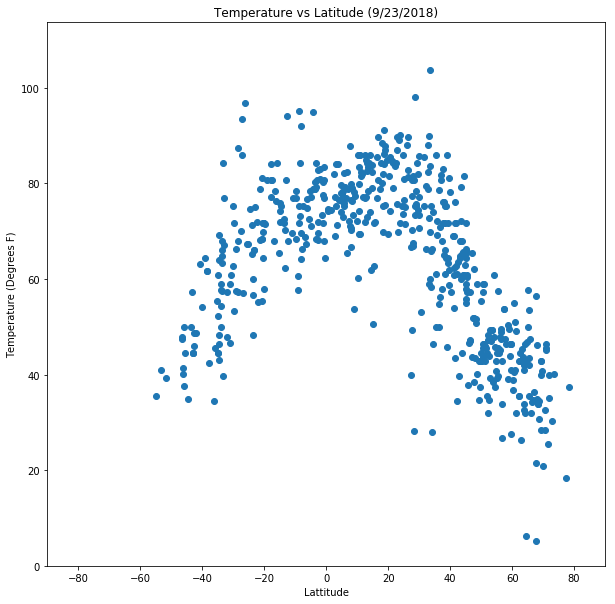

<Figure size 720x720 with 0 Axes>

In [41]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(temp)+10)
plt.scatter(plot_lat, temp)
plt.xlabel("Lattitude")
plt.ylabel("Temperature (Degrees F)")
plt.title("Temperature vs Latitude (9/23/2018)")
plt.figure(figsize=(10,10))
plt.savefig("LatVsTemp.png")

<Figure size 720x720 with 0 Axes>

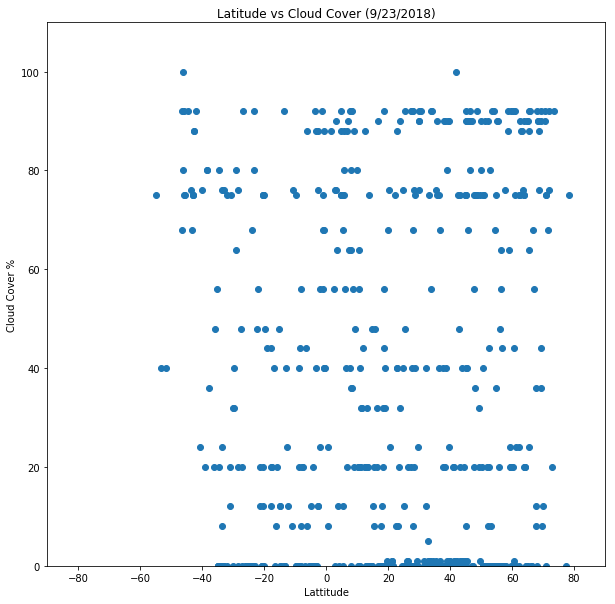

<Figure size 720x720 with 0 Axes>

In [38]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(cloud)+10)
plt.scatter(plot_lat, cloud)
plt.xlabel("Lattitude")
plt.ylabel("Cloud Cover %")
plt.title("Latitude vs Cloud Cover (9/23/2018)")
plt.savefig("LatVsCloud.png")

<Figure size 720x720 with 0 Axes>

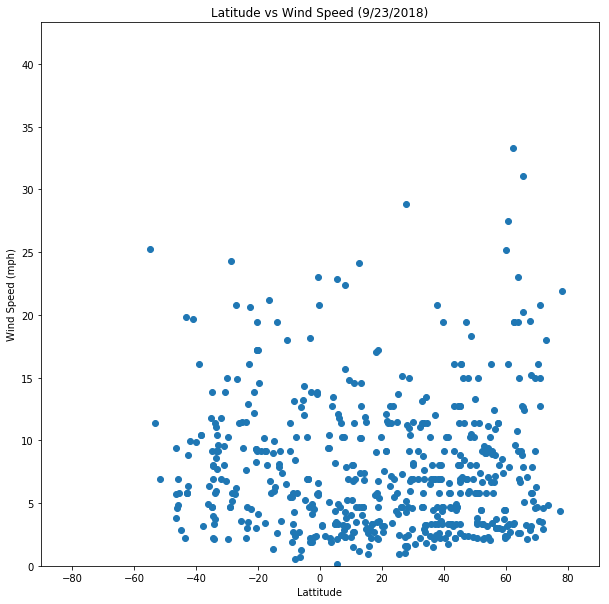

<Figure size 720x720 with 0 Axes>

In [39]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(wind)+10)
plt.scatter(plot_lat, wind)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (9/23/2018)")
plt.savefig("LatVsWind.png")

<Figure size 720x720 with 0 Axes>

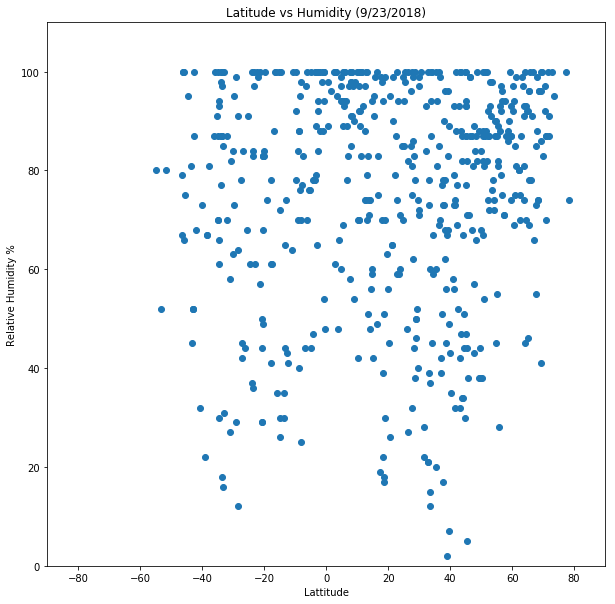

<Figure size 720x720 with 0 Axes>

In [40]:
plt.figure(figsize=(10,10))
plt.xlim(-90, 90)
plt.ylim(0, max(humidity)+10)
plt.scatter(plot_lat, humidity)
plt.xlabel("Lattitude")
plt.ylabel("Relative Humidity %")
plt.title("Latitude vs Humidity (9/23/2018)")
plt.savefig("LatVsHumid.png")